In [43]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.8 MB/s eta 0:00:00


In [59]:
import numpy as np
import pandas as pd
import missingno
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.Pclass = dataset.Gender.astype('category')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: >

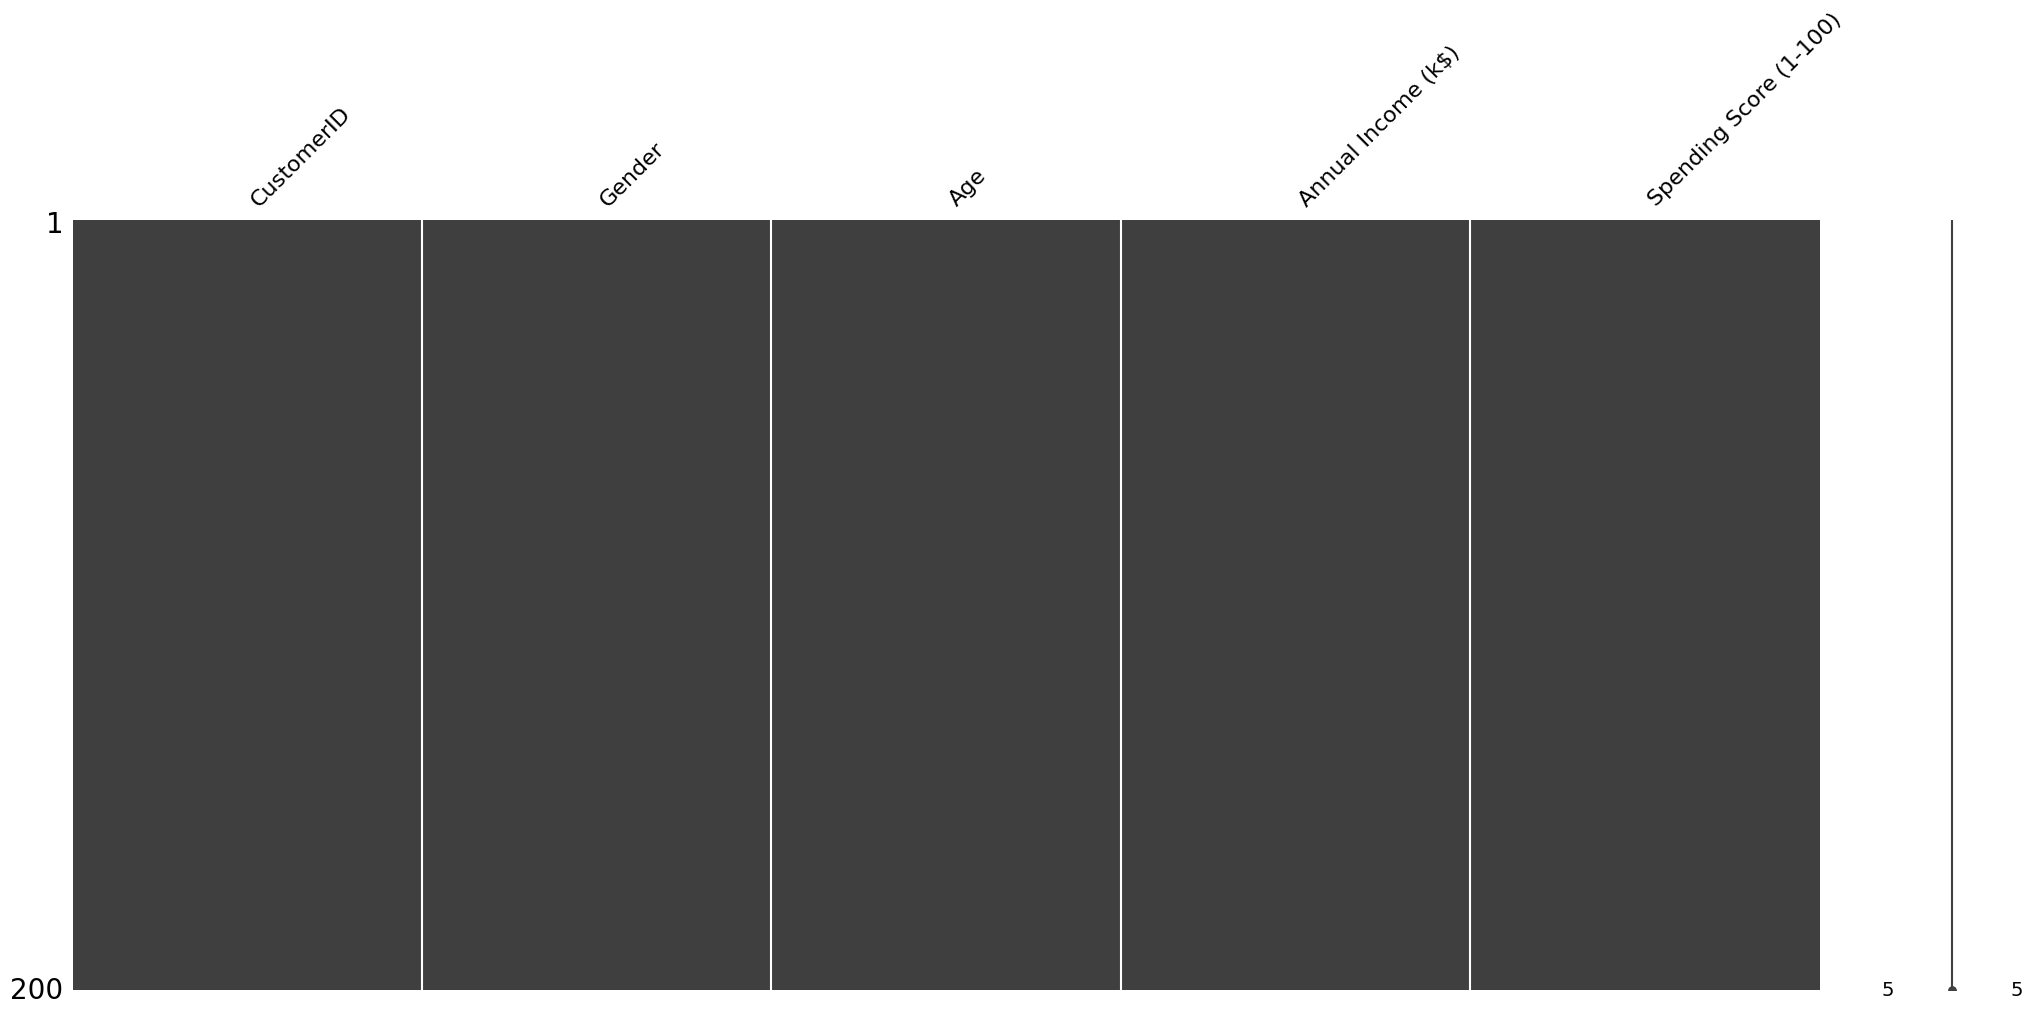

In [8]:
missingno.matrix(dataset)

In [9]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

In [18]:
gender_count = dataset['Gender'].value_counts(dropna = False)
gender_count

Gender
Female    112
Male       88
Name: count, dtype: int64

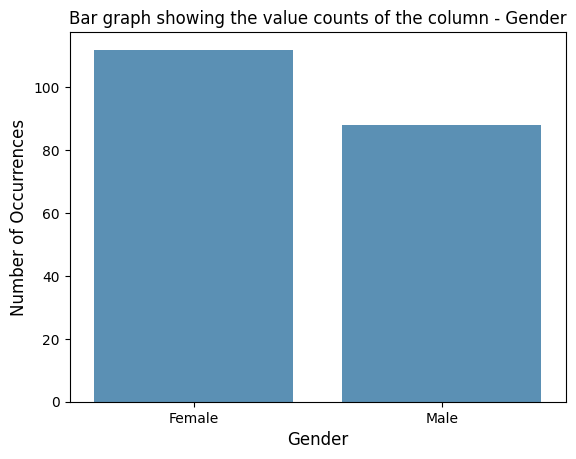

In [20]:
sns.barplot(x = gender_count.index, y = gender_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Gender')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [21]:
gender_income = dataset[['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


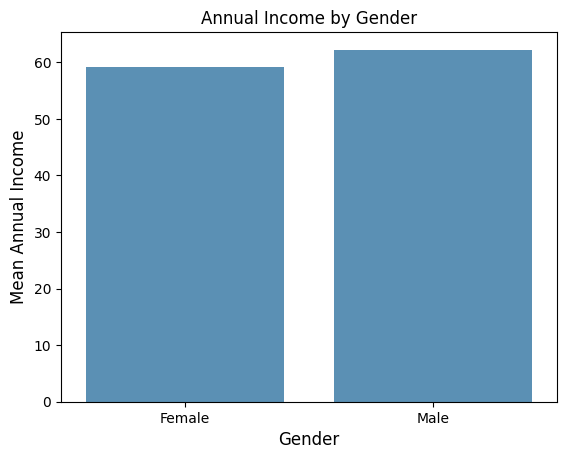

In [23]:
sns.barplot(x = gender_income['Gender'], y = gender_income['Annual Income (k$)'], alpha = 0.8)
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [24]:
gender_score = dataset[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()
gender_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


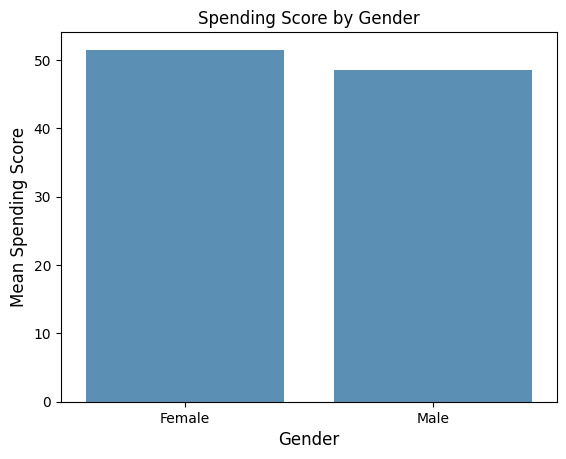

In [25]:
sns.barplot(x = gender_score['Gender'], y = gender_score['Spending Score (1-100)'], alpha = 0.8)
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [26]:
gender_age = dataset[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


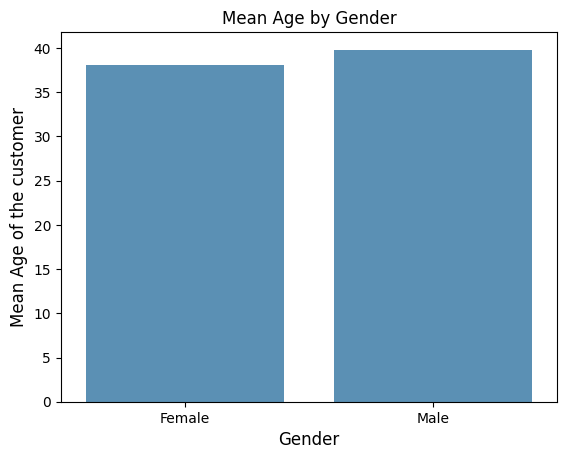

In [28]:
sns.barplot(x = gender_age['Gender'], y = gender_age['Age'], alpha = 0.8)
plt.title('Mean Age by Gender')
plt.ylabel('Mean Age of the customer', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

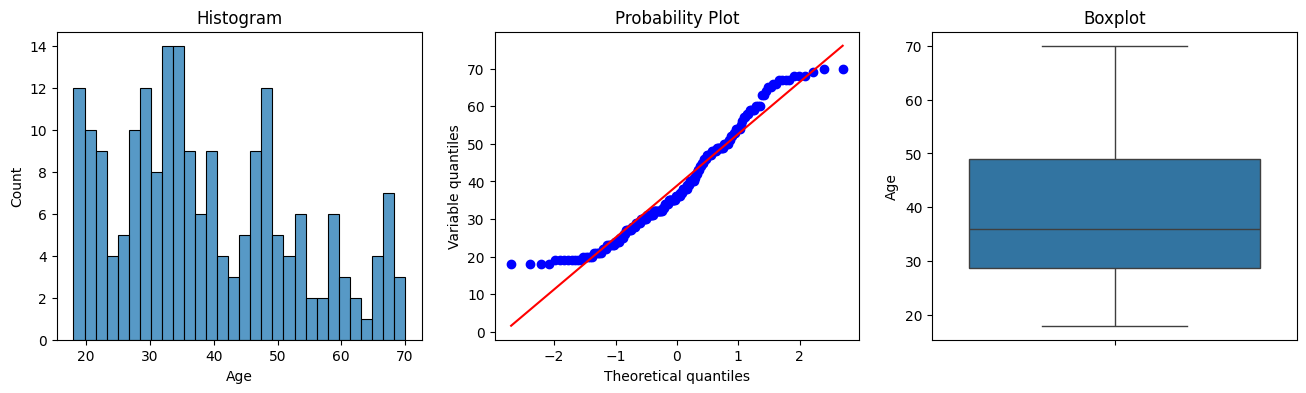

In [29]:
diagnostic_plots(dataset, 'Age')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

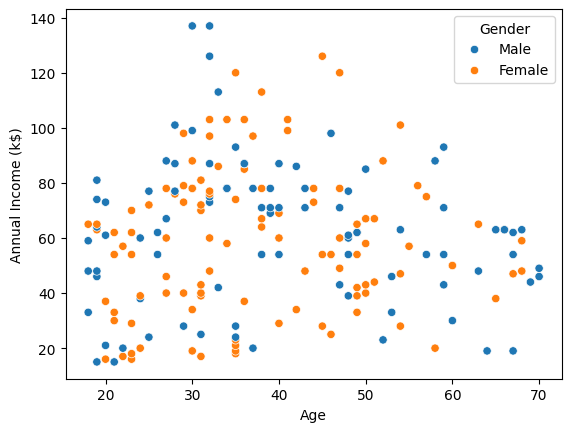

In [30]:
sns.scatterplot(data = dataset, x = "Age", y = "Annual Income (k$)", hue = "Gender")

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

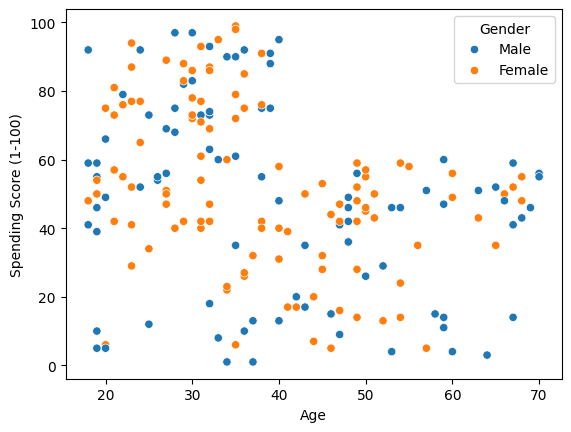

In [31]:
sns.scatterplot(data = dataset, x = "Age", y = "Spending Score (1-100)", hue = "Gender")

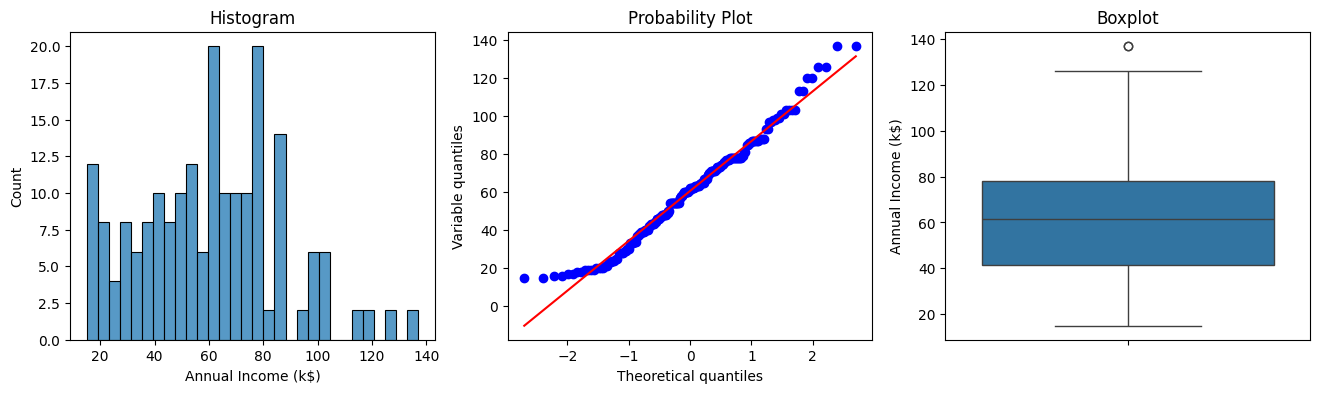

In [32]:
diagnostic_plots(dataset, 'Annual Income (k$)')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

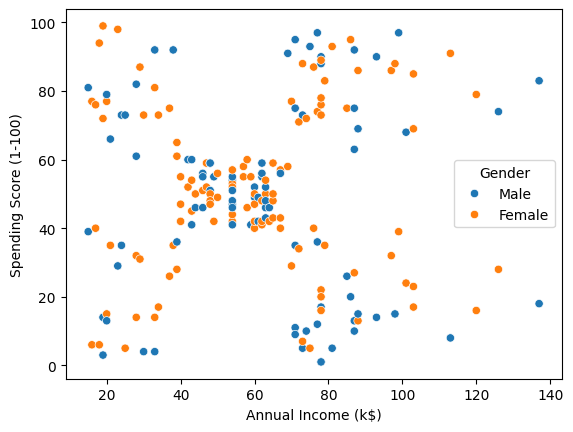

In [33]:
sns.scatterplot(data = dataset, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

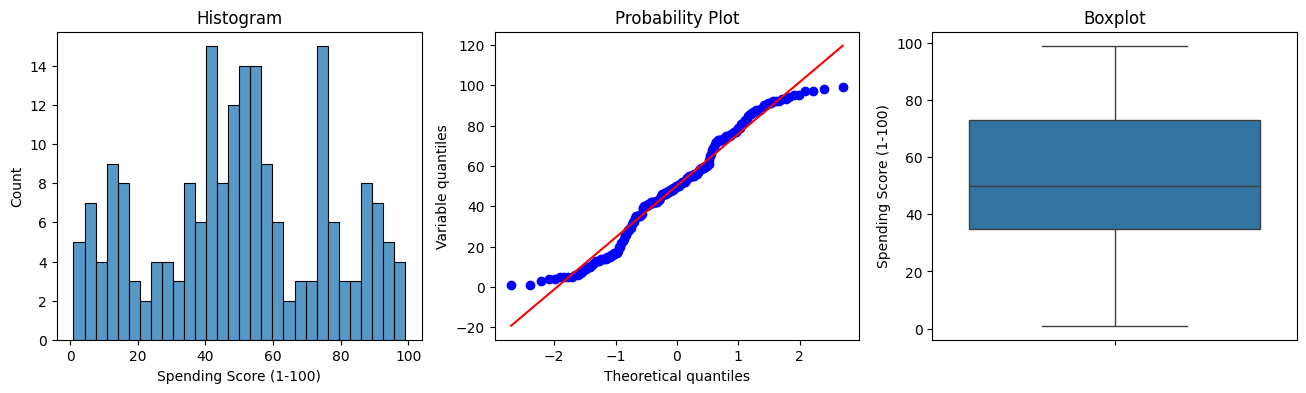

In [34]:
diagnostic_plots(dataset, 'Spending Score (1-100)')

In [35]:
def detect_outliers(df, n, features_list):
    outlier_indices = []
    for feature in features_list:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(dataset, 2, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 0 indices:  []


In [36]:
dataset.drop(['CustomerID'], axis = 1, inplace = True)
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


#K MEANS CLUSTERING

In [37]:
X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

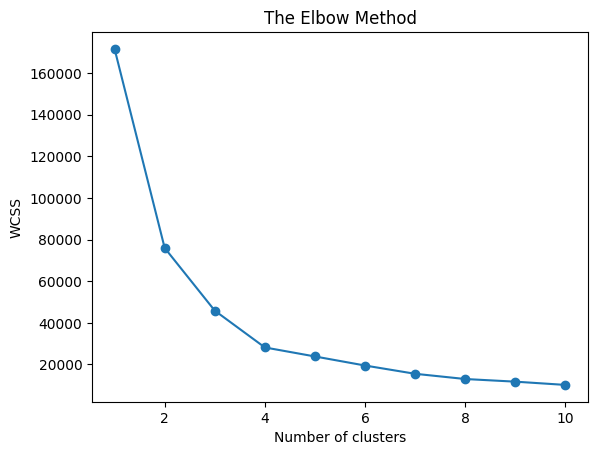

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

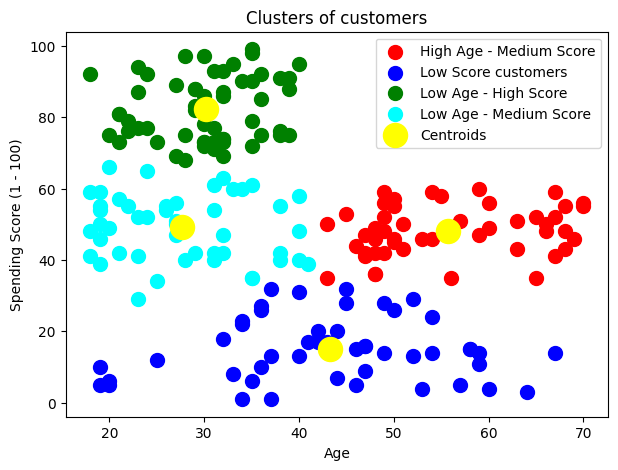

In [40]:
plt.figure(figsize = (7, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'High Age - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low Score customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Age - High Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Age - Medium Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [41]:
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.5
Calinski Harabasz Score : 332.56


#K MEDOID CLUSTERING

In [47]:
X = dataset[['Age', 'Spending Score (1-100)']].values

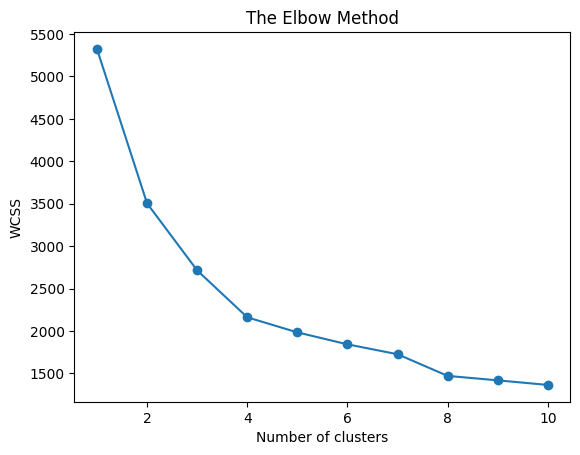

In [48]:
wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, init='k-medoids++', random_state=42)
    kmedoids.fit(X)
    wcss.append(kmedoids.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
kmedoids = KMedoids(n_clusters=4, init='k-medoids++', random_state=42)
y_kmedoids = kmedoids.fit_predict(X)

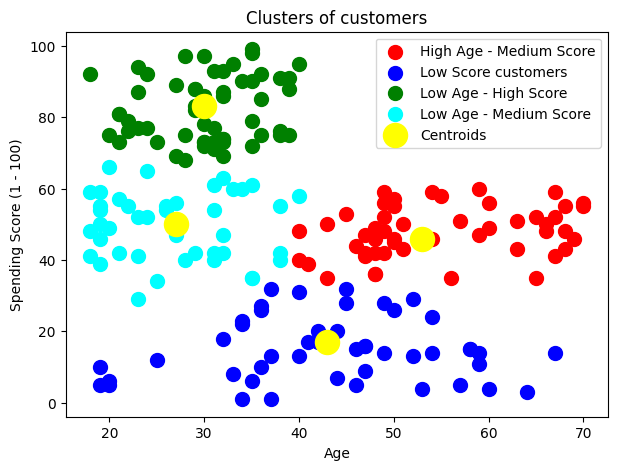

In [50]:
plt.figure(figsize=(7, 5))
plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s=100, c='red', label='High Age - Medium Score')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s=100, c='blue', label='Low Score customers')
plt.scatter(X[y_kmedoids == 2, 0], X[y_kmedoids == 2, 1], s=100, c='green', label='Low Age - High Score')
plt.scatter(X[y_kmedoids == 3, 0], X[y_kmedoids == 3, 1], s=100, c='cyan', label='Low Age - Medium Score')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [51]:
silhouette_score_kmedoids = round(silhouette_score(X, y_kmedoids), 2)
calinski_harabasz_score_kmedoids = round(calinski_harabasz_score(X, y_kmedoids), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmedoids))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmedoids))

Silhouette Score : 0.5
Calinski Harabasz Score : 331.18


#HIERARCHIAL CLUSTERING

In [52]:
X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

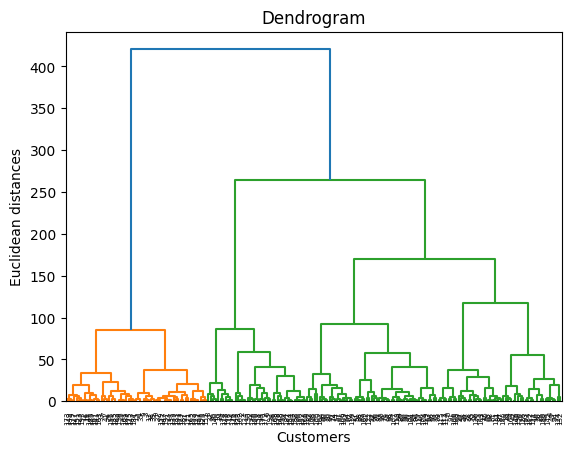

In [53]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [54]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

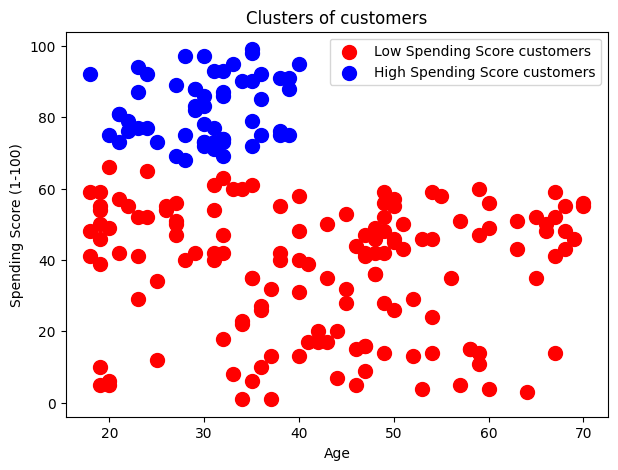

In [55]:
plt.figure(figsize = (7, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low Spending Score customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Spending Score customers')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [56]:
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.45
Calinski Harabasz Score : 210.56


#DBSCAN

In [60]:
X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

In [61]:
dbscan = DBSCAN(eps=5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

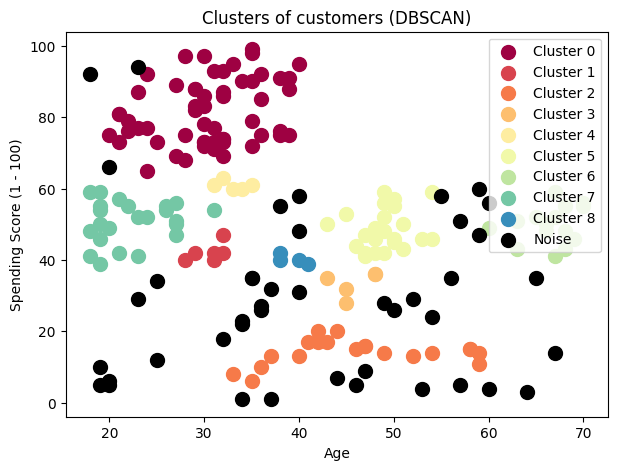

In [62]:
plt.figure(figsize=(7, 5))
unique_labels = set(y_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black used for noise.
    class_member_mask = (y_dbscan == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=100, color=tuple(col), label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('Clusters of customers (DBSCAN)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [63]:
silhouette_score_dbscan = silhouette_score(X, y_dbscan) if len(set(y_dbscan)) > 1 else -1
calinski_harabasz_score_dbscan = calinski_harabasz_score(X, y_dbscan) if len(set(y_dbscan)) > 1 else -1

print('Silhouette Score : {}'.format(round(silhouette_score_dbscan, 2)))
print('Calinski Harabasz Score : {}'.format(round(calinski_harabasz_score_dbscan, 2)))

Silhouette Score : 0.18
Calinski Harabasz Score : 64.0


In [64]:
table = []
print('Segmentation using Age and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([1, 'K - Medoid clustering', silhouette_score_kmedoids, calinski_harabasz_score_kmedoids])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
table.append([1, 'DBSCAN clustering', silhouette_score_dbscan, calinski_harabasz_score_dbscan])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │           0.5      │                  332.56   │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      1 │ K - Medoid clustering  │           0.5      │                  331.18   │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │           0.45     │                  210.56   │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      1 │ DBSCAN clustering      │           0.181565 │                   63.9994 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


#K MEANS CLUSTERING

In [65]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

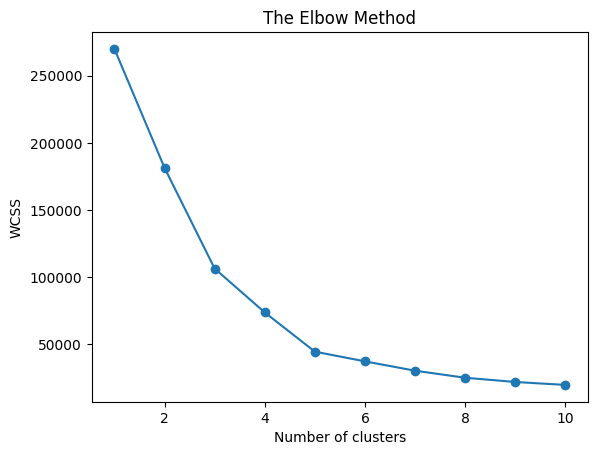

In [66]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

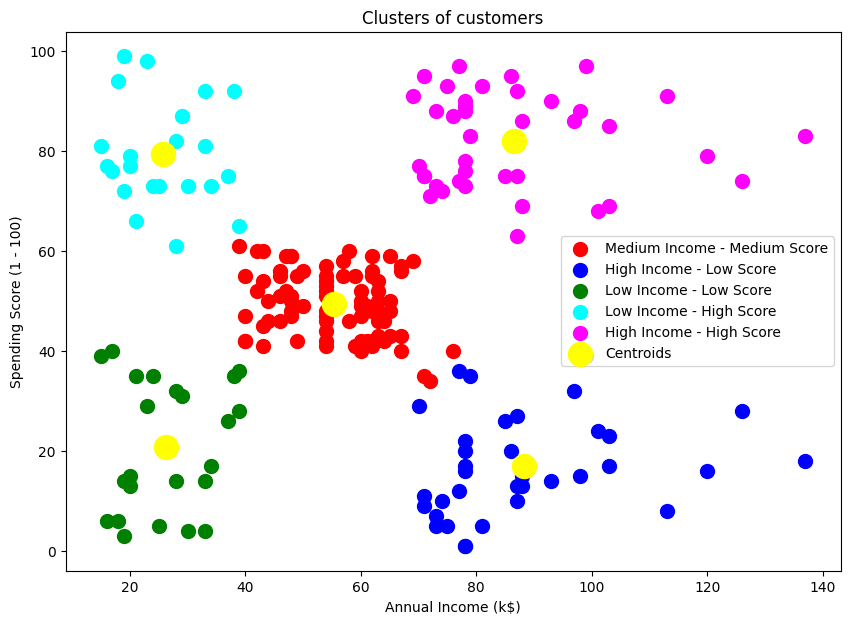

In [68]:
plt.figure(figsize = (10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Medium Income - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Income - Low Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income - High Score')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income - High Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [69]:
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.55
Calinski Harabasz Score : 247.36


#K MEDOID CLUSTERING

In [ ]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

In [70]:
kmedoids = KMedoids(n_clusters=5, init='k-medoids++', random_state=42)
y_kmedoids = kmedoids.fit_predict(X)

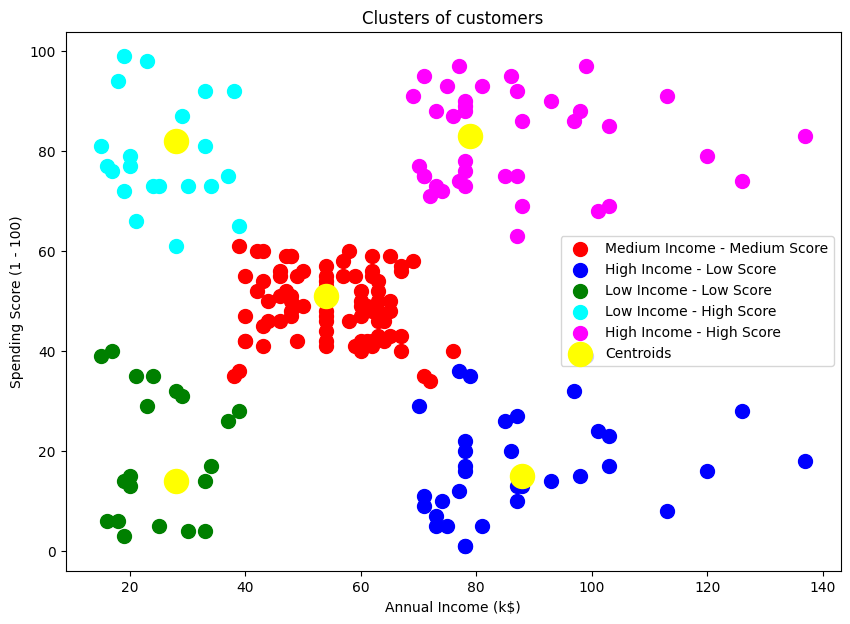

In [71]:
plt.figure(figsize=(10, 7))
plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s=100, c='red', label='Medium Income - Medium Score')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s=100, c='blue', label='High Income - Low Score')
plt.scatter(X[y_kmedoids == 2, 0], X[y_kmedoids == 2, 1], s=100, c='green', label='Low Income - Low Score')
plt.scatter(X[y_kmedoids == 3, 0], X[y_kmedoids == 3, 1], s=100, c='cyan', label='Low Income - High Score')
plt.scatter(X[y_kmedoids == 4, 0], X[y_kmedoids == 4, 1], s=100, c='magenta', label='High Income - High Score')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [72]:
silhouette_score_kmedoids = round(silhouette_score(X, y_kmedoids), 2)
calinski_harabasz_score_kmedoids = round(calinski_harabasz_score(X, y_kmedoids), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmedoids))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmedoids))

Silhouette Score : 0.55
Calinski Harabasz Score : 246.41


#HIERARCHICAL CLUSTERING

In [73]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

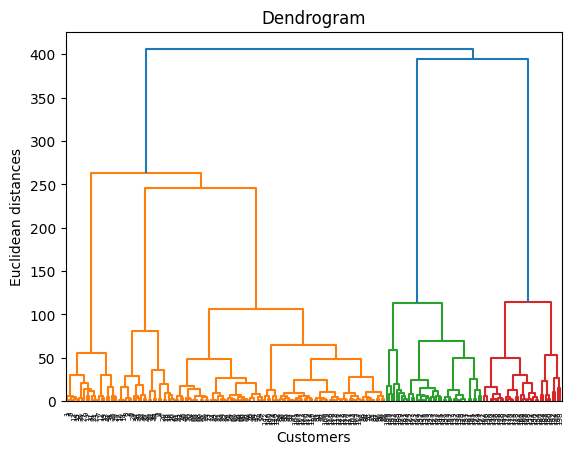

In [74]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [75]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

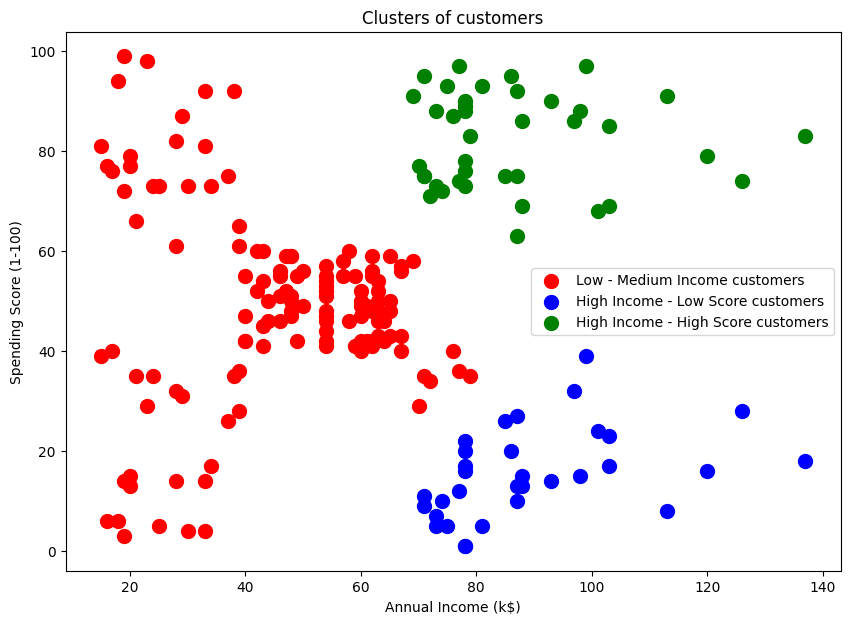

In [76]:
plt.figure(figsize = (10, 7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low - Medium Income customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'High Income - High Score customers')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [77]:
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.46
Calinski Harabasz Score : 143.82


#DBSCAN CLUSTERING

In [87]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

In [88]:
dbscan = DBSCAN(eps=3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

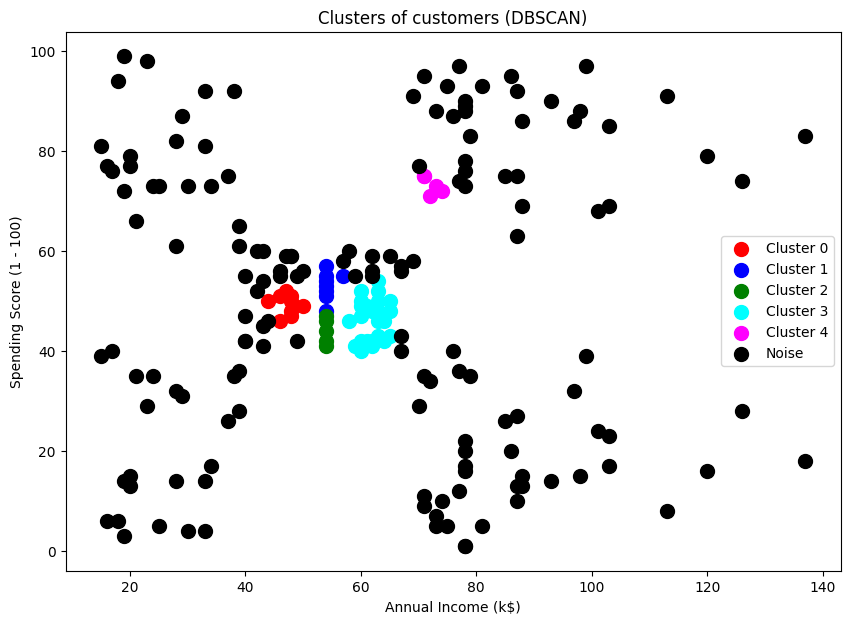

In [89]:
# Plotting the clusters
plt.figure(figsize = (10, 7))
unique_labels = set(y_dbscan)
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'orange']

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (y_dbscan == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s = 100, c = col, label = f'Cluster {k}' if k != -1 else 'Noise')

plt.title('Clusters of customers (DBSCAN)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [90]:
if len(unique_labels) > 1:
    silhouette_score_dbscan = round(silhouette_score(X, y_dbscan), 2)
    calinski_harabasz_score_dbscan = round(calinski_harabasz_score(X, y_dbscan), 2)

    print('Silhouette Score : {}'.format(silhouette_score_dbscan))
    print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_dbscan))
else:
    print("Silhouette Score and Calinski Harabasz Score cannot be calculated with a single cluster.")

Silhouette Score : -0.26
Calinski Harabasz Score : 0.91


In [91]:
table = []
print('Segmentation using Age and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([1, 'K - Medoid clustering', silhouette_score_kmedoids, calinski_harabasz_score_kmedoids])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
table.append([1, 'DBSCAN clustering', silhouette_score_dbscan, calinski_harabasz_score_dbscan])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.55 │                    247.36 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      1 │ K - Medoid clustering  │               0.55 │                    246.41 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.46 │                    143.82 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      1 │ DBSCAN clustering      │              -0.26 │                      0.91 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


#K MEANS CLUSTERING

In [92]:
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

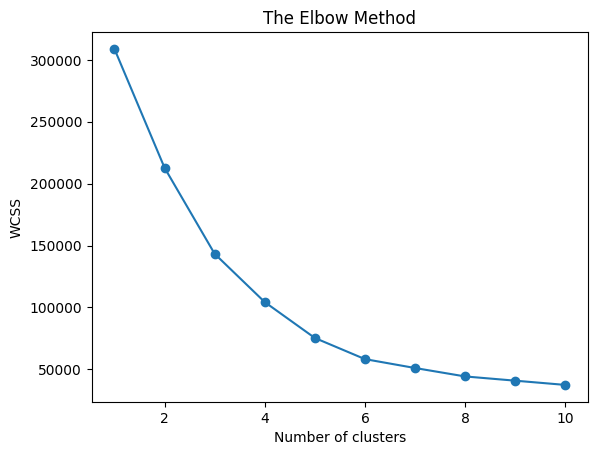

In [93]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [94]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

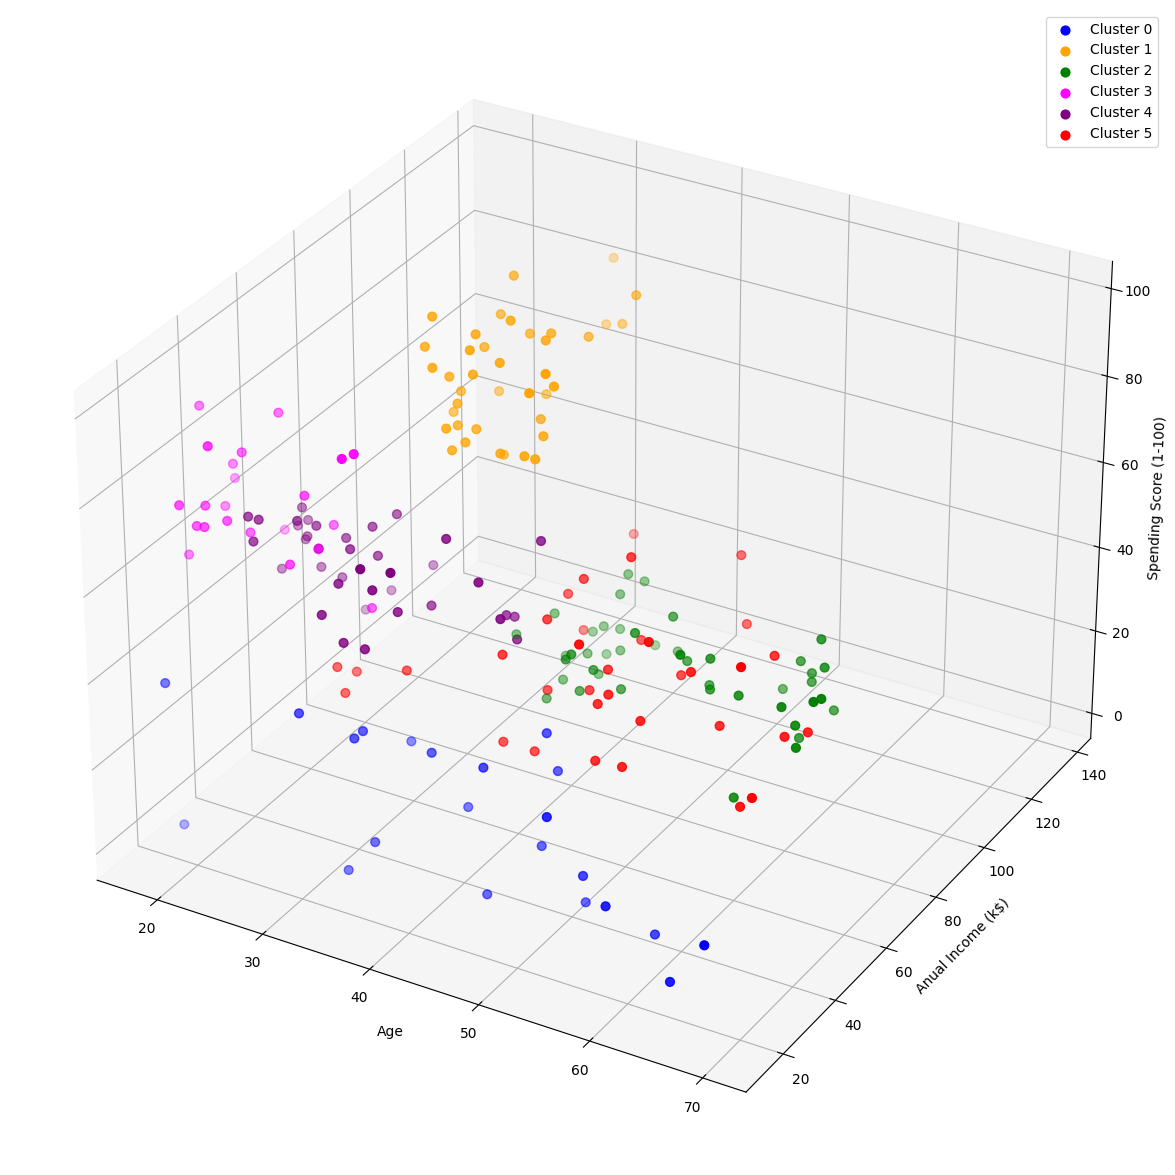

In [95]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 40 , color = 'magenta', label = "Cluster 3")
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 40 , color = 'purple', label = "Cluster 4")
ax.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s = 40 , color = 'red', label = "Cluster 5")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [96]:
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.45
Calinski Harabasz Score : 166.71


#K MEDOID CLUSTERING

In [97]:
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

In [98]:
kmedoids = KMedoids(n_clusters=6, init='k-medoids++', random_state=42)
y_kmedoids = kmedoids.fit_predict(X)

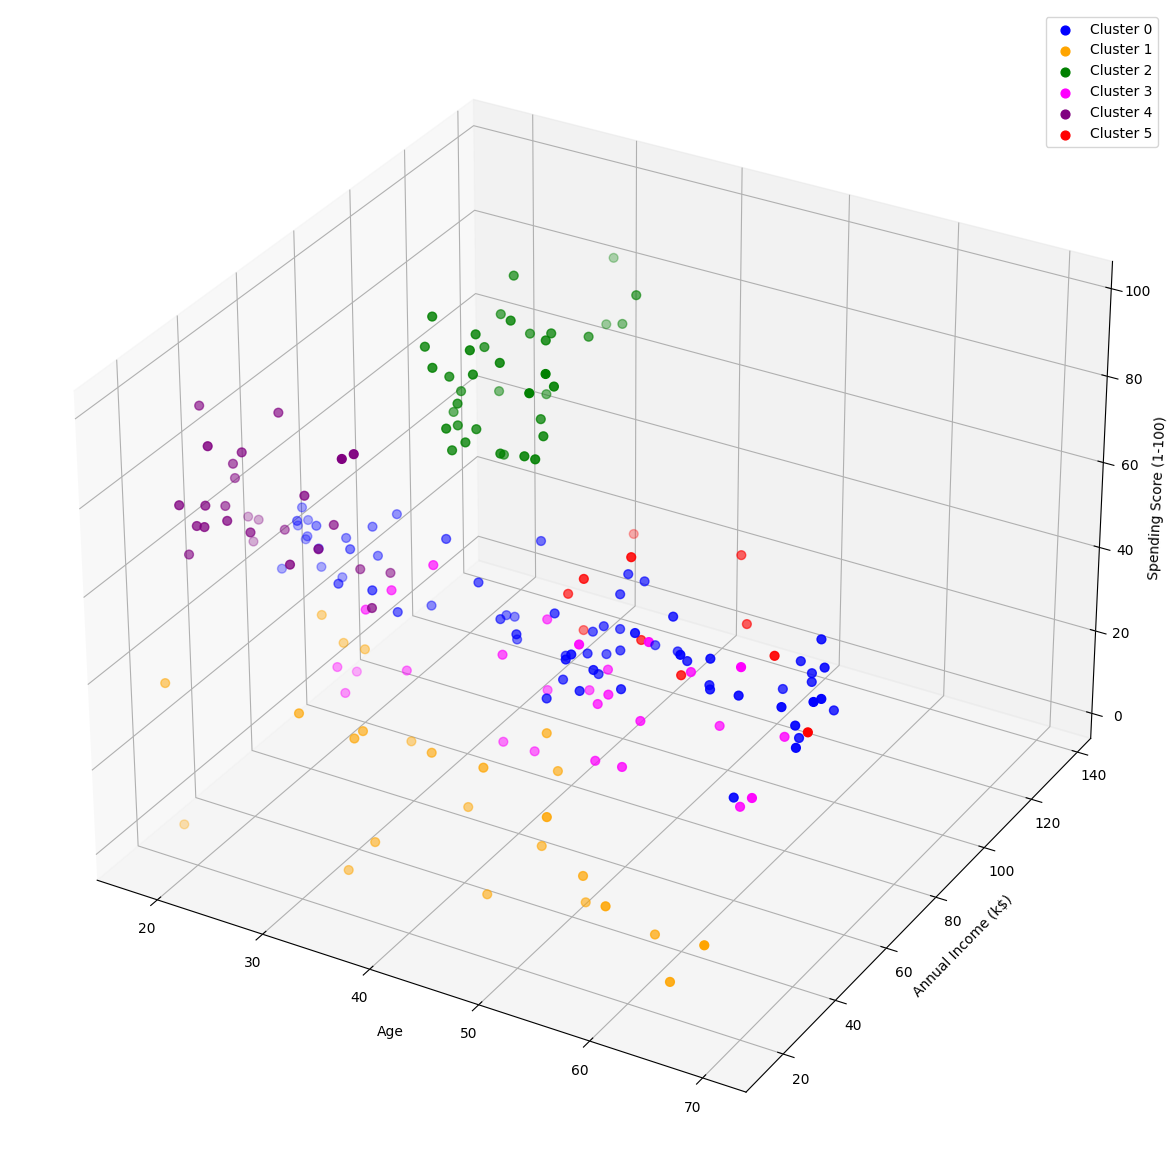

In [99]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'orange', 'green', 'magenta', 'purple', 'red']
labels = [f"Cluster {i}" for i in range(6)]
for i in range(6):
    ax.scatter(X[y_kmedoids == i, 0], X[y_kmedoids == i, 1], X[y_kmedoids == i, 2], s=40, color=colors[i], label=labels[i])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [100]:
silhouette_score_kmedoids = round(silhouette_score(X, y_kmedoids), 2)
calinski_harabasz_score_kmedoids = round(calinski_harabasz_score(X, y_kmedoids), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmedoids))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmedoids))

Silhouette Score : 0.4
Calinski Harabasz Score : 132.96


#HIERARCHICAL CLUSTERING

In [101]:
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

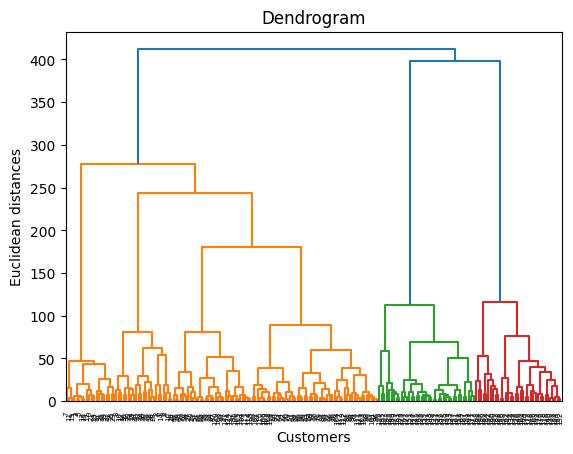

In [102]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [103]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

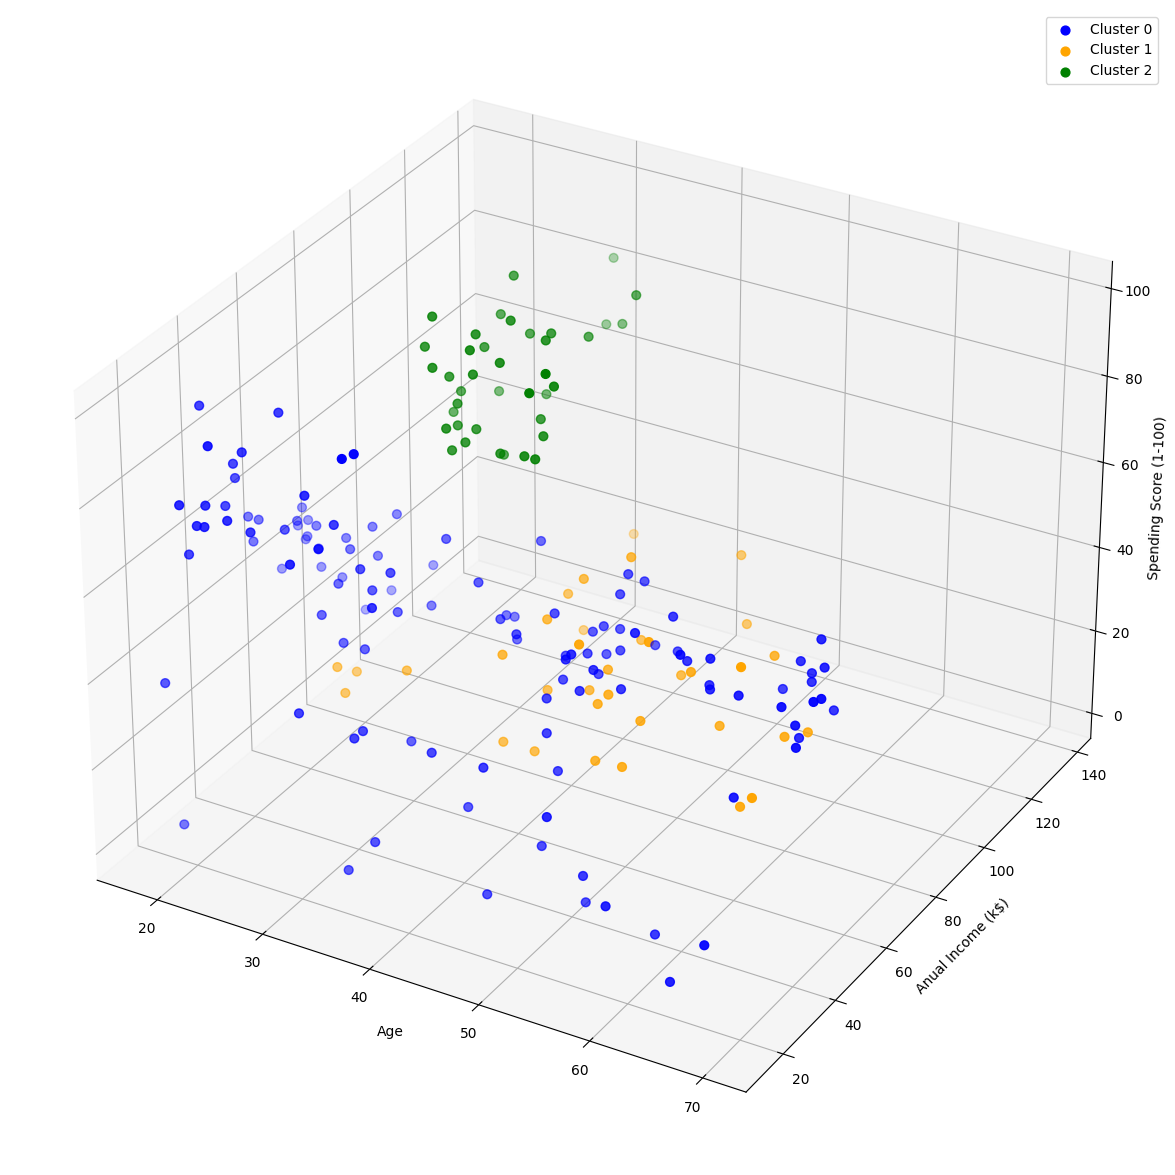

In [104]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], X[y_hc == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], X[y_hc == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], X[y_hc == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [105]:
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.38
Calinski Harabasz Score : 111.46


#DBSCAN CLUSTERING

In [107]:
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

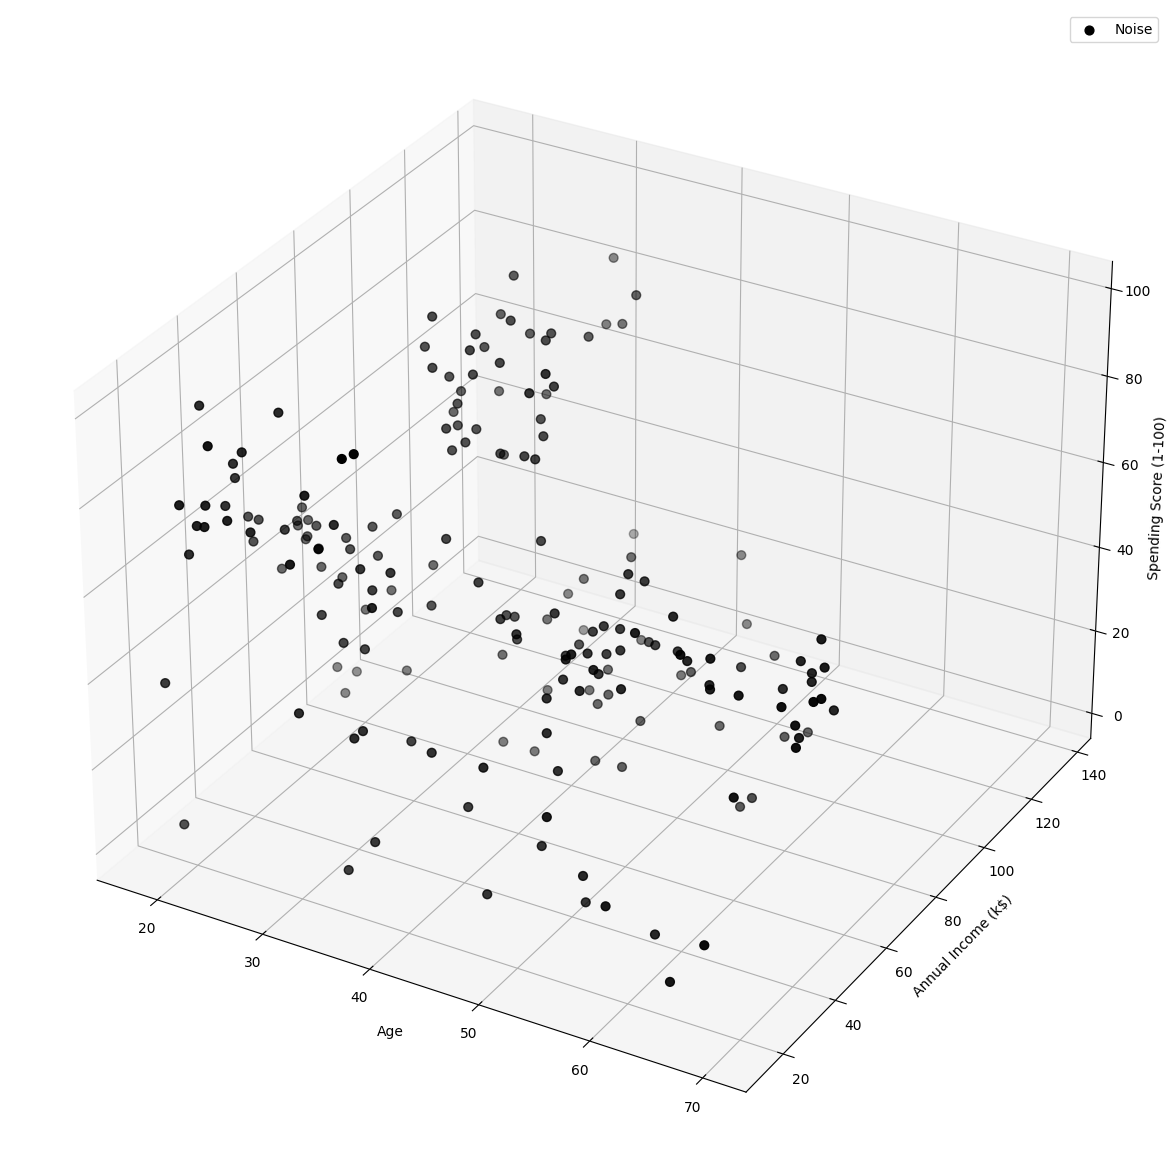

In [108]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
unique_labels = set(y_dbscan)
colors = ['blue', 'orange', 'green', 'magenta', 'purple', 'red', 'cyan', 'yellow', 'black', 'pink']

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        label = 'Noise'
    else:
        label = f"Cluster {k}"
    class_member_mask = (y_dbscan == k)
    ax.scatter(X[class_member_mask, 0], X[class_member_mask, 1], X[class_member_mask, 2], s=40, color=col, label=label)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [109]:
if len(set(y_dbscan)) > 1:  # Silhouette Score is only valid if more than one cluster is found
    silhouette_score_dbscan = round(silhouette_score(X, y_dbscan), 2)
    calinski_harabasz_score_dbscan = round(calinski_harabasz_score(X, y_dbscan), 2)

    print('Silhouette Score : {}'.format(silhouette_score_dbscan))
    print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_dbscan))
else:
    print("DBSCAN did not find enough clusters to calculate Silhouette Score and Calinski Harabasz Score")

DBSCAN did not find enough clusters to calculate Silhouette Score and Calinski Harabasz Score


In [111]:
table = []
print('Segmentation using Age and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([1, 'K - Medoid clustering', silhouette_score_kmedoids, calinski_harabasz_score_kmedoids])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.45 │                    166.71 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      1 │ K - Medoid clustering  │               0.4  │                    132.96 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.38 │                    111.46 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛
